<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/KNN_to_predict_hatecrimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Using KNN on a dataset example** 



**K nearest neigbors to predict hate crimes** 

Data comes from the following link: https://usafacts.org/data/topics/people-society/democracy-and-society/civil-rights/hate-crime-offenders/

# **Data collection/wrangling**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
fname = "/hatecrimes.csv"

In [3]:
hatecrimes = pd.read_csv(fname)

In [4]:
# Transposing the data 
hatecrimes = hatecrimes.T

In [5]:
# selecting only the columns we want 
hatecrimes = hatecrimes[[0, 2, 18, 25, 29, 33, 37]]

In [6]:
# filling in missing values 
hatecrimes = hatecrimes.fillna(method='bfill')

In [7]:
# resetting the index 
hatecrimes = hatecrimes.reset_index()
hatecrimes

,index,0,2,18,25,29,33,37
0,Years,Hate crime offenders (People),Religion (People),Sexual orientation (People),Disability (People),Gender (People),Gender identity (People),"Race, ethnicity, or ancestry (People)"
1,1996,8935,604,1258,54,20,39,5220
2,1997,8474,604,1258,54,20,39,5220
3,1998,7489,604,1258,54,20,39,5220
4,1999,7271,604,1258,54,20,39,5220
5,2000,7530,604,1258,54,20,39,5220
6,2001,9239,604,1258,54,20,39,5220
7,2002,7314,604,1258,54,20,39,5220
8,2003,6934,604,1258,54,20,39,5220
9,2004,7145,604,1258,54,20,39,5220


In [8]:
# checking our dtypes 
hatecrimes.dtypes

index    object
0        object
2        object
18       object
25       object
29       object
33       object
37       object
dtype: object

In [9]:
# getting the column names in a list 
colnames = hatecrimes.iloc[0]
colnames = list(colnames)
colnames

['Years',
 'Hate crime offenders (People)',
 '        Religion (People)',
 '        Sexual orientation (People)',
 '        Disability (People)',
 '        Gender (People)',
 '        Gender identity (People)',
 '        Race, ethnicity, or ancestry (People)']

In [10]:
# adding the list of correct column names to the dataframe and dropping the incorrect row that contained the column names 
hatecrimes.columns = colnames
hatecrimes = hatecrimes.drop(axis=0, index=0)
hatecrimes

,Years,Hate crime offenders (People),Religion (People),Sexual orientation (People),Disability (People),Gender (People),Gender identity (People),"Race, ethnicity, or ancestry (People)"
1,1996,8935,604,1258,54,20,39,5220
2,1997,8474,604,1258,54,20,39,5220
3,1998,7489,604,1258,54,20,39,5220
4,1999,7271,604,1258,54,20,39,5220
5,2000,7530,604,1258,54,20,39,5220
6,2001,9239,604,1258,54,20,39,5220
7,2002,7314,604,1258,54,20,39,5220
8,2003,6934,604,1258,54,20,39,5220
9,2004,7145,604,1258,54,20,39,5220
10,2005,6804,580,1138,54,20,39,5028


In [11]:
# converting all values to numeric from string 
hatecrimes = hatecrimes.apply(pd.to_numeric)
hatecrimes

,Years,Hate crime offenders (People),Religion (People),Sexual orientation (People),Disability (People),Gender (People),Gender identity (People),"Race, ethnicity, or ancestry (People)"
1,1996,8935.0,604.0,1258.0,54.0,20.0,39.0,5220.0
2,1997,8474.0,604.0,1258.0,54.0,20.0,39.0,5220.0
3,1998,7489.0,604.0,1258.0,54.0,20.0,39.0,5220.0
4,1999,7271.0,604.0,1258.0,54.0,20.0,39.0,5220.0
5,2000,7530.0,604.0,1258.0,54.0,20.0,39.0,5220.0
6,2001,9239.0,604.0,1258.0,54.0,20.0,39.0,5220.0
7,2002,7314.0,604.0,1258.0,54.0,20.0,39.0,5220.0
8,2003,6934.0,604.0,1258.0,54.0,20.0,39.0,5220.0
9,2004,7145.0,604.0,1258.0,54.0,20.0,39.0,5220.0
10,2005,6804.0,580.0,1138.0,54.0,20.0,39.0,5028.0


In [12]:
# rechecking our data types 
hatecrimes.dtypes

Years                                              int64
Hate crime offenders (People)                    float64
        Religion (People)                        float64
        Sexual orientation (People)              float64
        Disability (People)                      float64
        Gender (People)                          float64
        Gender identity (People)                 float64
        Race, ethnicity, or ancestry (People)    float64
dtype: object

In [13]:
# creating a classifier for total # of hatecrimes 1:5 for every 1000 increase in hatecrimes 
offenderclass = []
for ii in hatecrimes['Hate crime offenders (People)']: 
  if ii >= 5000 and ii <= 5999:
    ii = 1
  elif ii >= 6000 and ii <= 6999:
    ii = 2
  elif ii >= 7000 and ii <= 7999:
    ii = 3
  elif ii >= 8000 and ii <= 8999:
    ii = 4
  elif ii >= 9000:
    ii = 5
  offenderclass.append(ii)
offenderclass
  


[4, 4, 3, 3, 3, 5, 3, 2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2]

In [14]:
# adding the classifier variable created above back into the dataframe 
hatecrimes['offenderclass'] = offenderclass
hatecrimes



,Years,Hate crime offenders (People),Religion (People),Sexual orientation (People),Disability (People),Gender (People),Gender identity (People),"Race, ethnicity, or ancestry (People)",offenderclass
1,1996,8935.0,604.0,1258.0,54.0,20.0,39.0,5220.0,4
2,1997,8474.0,604.0,1258.0,54.0,20.0,39.0,5220.0,4
3,1998,7489.0,604.0,1258.0,54.0,20.0,39.0,5220.0,3
4,1999,7271.0,604.0,1258.0,54.0,20.0,39.0,5220.0,3
5,2000,7530.0,604.0,1258.0,54.0,20.0,39.0,5220.0,3
6,2001,9239.0,604.0,1258.0,54.0,20.0,39.0,5220.0,5
7,2002,7314.0,604.0,1258.0,54.0,20.0,39.0,5220.0,3
8,2003,6934.0,604.0,1258.0,54.0,20.0,39.0,5220.0,2
9,2004,7145.0,604.0,1258.0,54.0,20.0,39.0,5220.0,3
10,2005,6804.0,580.0,1138.0,54.0,20.0,39.0,5028.0,2


In [15]:
# inserting the new column for offender classification next to the column for hatecrime counts total
offendercount = hatecrimes.pop('offenderclass')
hatecrimes.insert(2, 'offenderclass', offendercount)
hatecrimes


,Years,Hate crime offenders (People),offenderclass,Religion (People),Sexual orientation (People),Disability (People),Gender (People),Gender identity (People),"Race, ethnicity, or ancestry (People)"
1,1996,8935.0,4,604.0,1258.0,54.0,20.0,39.0,5220.0
2,1997,8474.0,4,604.0,1258.0,54.0,20.0,39.0,5220.0
3,1998,7489.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
4,1999,7271.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
5,2000,7530.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
6,2001,9239.0,5,604.0,1258.0,54.0,20.0,39.0,5220.0
7,2002,7314.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
8,2003,6934.0,2,604.0,1258.0,54.0,20.0,39.0,5220.0
9,2004,7145.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
10,2005,6804.0,2,580.0,1138.0,54.0,20.0,39.0,5028.0


In [16]:
# renaming the columns 
colnames = ['Years', 'Hatecrimeoffenders', 'offenderclass', 'religion', 'sex_orientation', 'disability', 'gender', 'gender_id', 'race']
hatecrimes.columns = colnames
hatecrimes 

,Years,Hatecrimeoffenders,offenderclass,religion,sex_orientation,disability,gender,gender_id,race
1,1996,8935.0,4,604.0,1258.0,54.0,20.0,39.0,5220.0
2,1997,8474.0,4,604.0,1258.0,54.0,20.0,39.0,5220.0
3,1998,7489.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
4,1999,7271.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
5,2000,7530.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
6,2001,9239.0,5,604.0,1258.0,54.0,20.0,39.0,5220.0
7,2002,7314.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
8,2003,6934.0,2,604.0,1258.0,54.0,20.0,39.0,5220.0
9,2004,7145.0,3,604.0,1258.0,54.0,20.0,39.0,5220.0
10,2005,6804.0,2,580.0,1138.0,54.0,20.0,39.0,5028.0


#**Visualize the data**

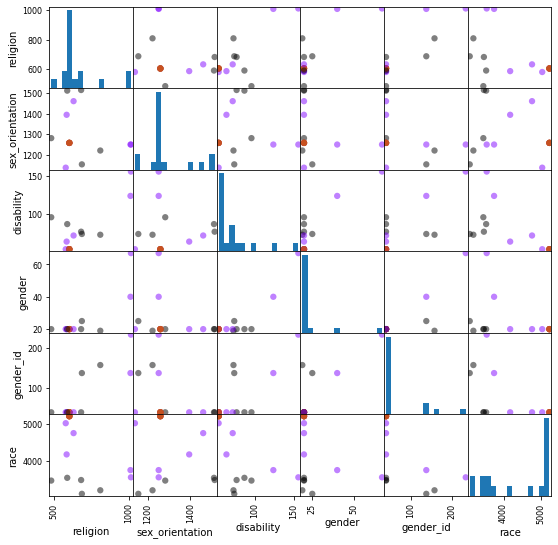

In [17]:
# plotting a scatter matrix
from matplotlib import cm

X = hatecrimes[['religion', 'sex_orientation', 'disability', 'gender', 'gender_id', 'race']]
y = hatecrimes['offenderclass']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

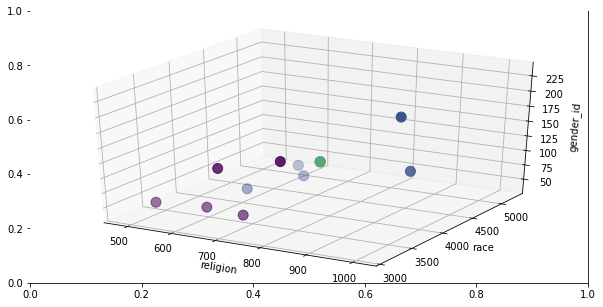

In [18]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig, ax = plt.subplots(1,1, figsize=(10, 5))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['religion'], X_train['race'], X_train['gender_id'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('religion')
ax.set_ylabel('race')
ax.set_zlabel('gender_id')
plt.show()

# **Machine Learning**

**Create train-test split**

In [19]:
# For this example, we use the features that will attempt to predict the greatest amount of hatecrimes 
X = hatecrimes[['religion', 'sex_orientation', 'disability', 'gender', 'gender_id', 'race']]
y = hatecrimes['offenderclass']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Create classifier object**

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

**Train the estimator and fit the estimator using the training data**

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Estimate the accuracy of the classifier on future data, using the test data**

In [22]:
knn.score(X_test, y_test)

0.6666666666666666

**How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?**

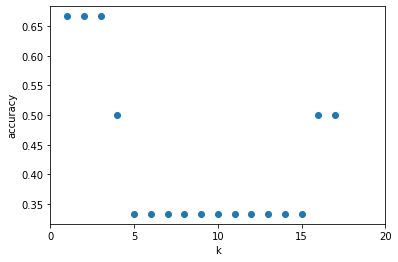

In [23]:
k_range = range(1,18)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

**How sensitive is k-NN classification accuracy to the train/test split proportion?**

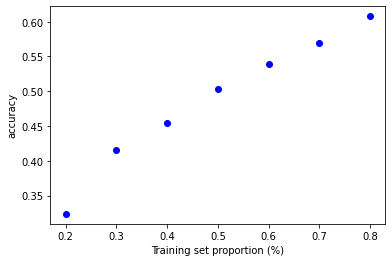

In [24]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 3)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');